***
***

<center><h1>Prevendo o futuro - Machine Learning</h1></center>

***
***

<center><img src = 'https://weareogx.com/wp-content/uploads/2017/08/meeting.jpg' width = 90%></center>

***

***
# Descrição

> A empresa <b>Alura</b> deseja criar ferramentas afim de otimizar e facilitar a vida dos clientes que utilizam a sua plataforma. O site da <b>Alura</b> permite que pessoas ou grupos privados coloquem seus projetos para que sejam pegos e finalizados, cada projeto tem seu respectivo preço e a quantidade de horas que se espera que seja finalizado. O objetivo da empresa é desenvolver uma ferramenta utilizando aprendizado de máquina capaz de informar ao usuário que colou seu projeto no ar se ele será ou não pego para ser finalizado. Para isso utilizarei uma base de dados de informações sobre cada projeto que foi ou não pego para ser finalizado. Todos os dados que serão utilizados para a criação da I.A foram disponibilizados pela empresa <b>Alura</b>.

# Atributos:

<h4><b>Finished</b></h4>

> O atributo <b>Finished</b> nos informa se o projeto em análise foi ou não pego para ser finalizado, os valores da coluna <b>Finished</b> são <b>0</b> ou <b>1</b>, ou seja, <b>0</b> não foi pego e <b>1</b> foi pego e finalizado.

<h4><b>Expected_hours</b></h4>

> A variável <b>Expected_hours</b> nos informa qual foi a quantidade de horas que o usuário ou empresa esperava que fosse finalizado o projeto.

<h4><b>Price</b></h4>

> O atributo <b>Price</b> é preço que o usuário ou empresa ofereceu para quem pegasse e finalizasse o projeto disposto na plataforma <b>Alura</b>

# Esborço: <br>

A. **Instalação e Importação das Bibliotecas Básicas**<br>
I. [Importações](#Importações)<br>
II. [Verificações](#Verificações)<br>

B. **Importando Base de Dados**<br>
I. [Carregando a base de dados](#carregando)<br>
II. [Estrutura da base de dados](#estrutura)<br>
III. [Informações gerais sobre os dados](#informações)<br>

C. **Análises Gráficas**<br>
I. [Distribuição de Frequência](#dist)<br>
II. [Histogramas das variáveis explicativas](#hist)<br>
III. [Gráfico de Dispersão](#dispersão)<br>

D. **Análise de Correlação**<br>
I. [Matriz de Correlação](#corr)<br>

E. **Machine Learning - LinearSVC**<br>
I. [Instânciando e treinando o estimador](#linearsvc)<br>
II. [Avaliando o LinearSVC](#avaliandosvc)<br>
III. [Fronteira de Decisão do LinearSVC](#deicisaolinearsvc)<br>

F. **Machine Learning - SVC**<br>
I. [Reiscalando os Dados](#scaler)<br>
II. [Instânciando e treinando o estimador](#svc)<br>
III. [Avaliando o SVC](#avalsvc)<br>
IV. [Fronteira de Decisão do SVC](#deicisaosvc)<br>


***

# A. Importação das Bibliotecas Básicas <br>

> Nesta primeira etapa, importarei e verificarei todas as principais bibliotecas básicas que serão usadas ao longo do projeto, lembrando que essas são as bibliotecas básicas nas quais a maioria dos projetos que envolvem análise de dados e construção de modelos preditivos usa. Os links para a documentação de cada biblioteca estão abaixo.

> * matplotlib-: https://matplotlib.org/
> * Pytorch-: https://pytorch.org/
> * seaborn-: https://seaborn.pydata.org/
> * Pandas-: https://pandas.pydata.org/docs/#
> * numpy-: https://numpy.org/

## Ai. Importações:

<a id="Importações"></a>

In [1]:
# Ignoring Errors
import warnings
warnings.simplefilter("ignore")

import matplotlib

In [2]:
from torchsummary import summary
import matplotlib.pyplot as plt
from torch import nn, optim
import seaborn as sns
import pandas as pd
import numpy as np

## Aii. Verificando as Versões Instaladas:

<a id ="Verificações"></a>

In [3]:
print('---------= Versions =---------')
print(f'  Matplotlib version-: {matplotlib.__version__}')
print(f'  Seaborn version-: {sns.__version__}')
print(f'  Pytorch version-: {torch.__version__}')
print(f'  Pandas version-: {pd.__version__}')
print(f'  Numpy version-: {np.__version__}')
print('-' * 29)

---------= Versions =---------
  Matplotlib version-: 3.1.3
  Seaborn version-: 0.10.0
  Pytorch version-: 1.4.0
  Pandas version-: 0.25.3
  Numpy version-: 1.18.1
-----------------------------


***

# B. Importando a Base de Dados <br>

## Bi. Carregando a Base de Dados:

<a id="carregando"></a>

In [1]:
np.random.seed(2020)
torch.manual_seed(2020)

NameError: name 'np' is not defined

In [5]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

# Renomeando as colunas para pt-br
dados.columns = ['Finished', 'Expected_hours', 'Price']

# Mapeando a trocando 0 por 1 e 1 por 0
dados['Finished'] = dados['Finished'].map({0 : 1, 1 : 0})

In [6]:
dados.head(10).style.background_gradient(cmap = "Blues", subset=["Expected_hours"])\
                  .background_gradient(cmap = "Greens", subset=["Price"])\
                  .background_gradient(cmap = "Greens", subset=["Finished"])

,Finished,Expected_hours,Price
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170
5,0,33,173
6,0,64,1965
7,0,99,1993
8,0,45,278
9,1,96,12479


## Bii. Estrutura dos Dados:

<a id ="estrutura"></a>

In [7]:
dados.shape

(2157, 3)

In [8]:
print('--= Estrutura dos Dados =--')
print(f'    {dados.shape[0]} - Linhas')
print(f'    {dados.shape[1]} - Colunas')
print('-----------------------------')

--= Estrutura dos Dados =--
    2157 - Linhas
    3 - Colunas
-----------------------------


## Biii. Informações Gerais:

<a id = "informações"></a>

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 3 columns):
Finished          2157 non-null int64
Expected_hours    2157 non-null int64
Price             2157 non-null int64
dtypes: int64(3)
memory usage: 50.7 KB


***

# C. Análises Gráficas <br>

> Em análises gráficas vamos visualizar como os dados estão distribuidos. O objetivo é entender de forma visual as diferenças entre os atributos como preço e horas esperadas de projetos que estão sendo pegos e finalizados e os que não estão sendo pegos. As análises seguirão uma determinada ordem, isso facilitará o entendimento e nos dará as respostas que precisamos.

## Ci. Distribuição de Frequência

<a id = "dist"></a>

> Nesta primeira análise, irei ver como os dados estão distribuidos de forma geral, ou seja, será visualizado as distribuições de frequência de todos os registro de cada variável do DataFrame. Isso nos dará informações bem interessantes a respeito dos atributos em estudo. Mais informações de cada variável será descrita durante o processo de análise, abaixo está as visualizações e relatórios sobre cada observação.

<h3><b>Distribuição entre projetos finalizados e não finalizados</b></h3>

> Nesta visualização iremos ver como está a distribuição de projetos finalizados e não finalizados, isso nos dará um paranoma inicial interessante a respeito de como está a situação atual da platofoma <b>Alura</b>. Lembrando que o objetivo principal é máximizar o número de projetos que será finalizado dentro da plataforma.

In [10]:
cores = ['lime', 'crimson']

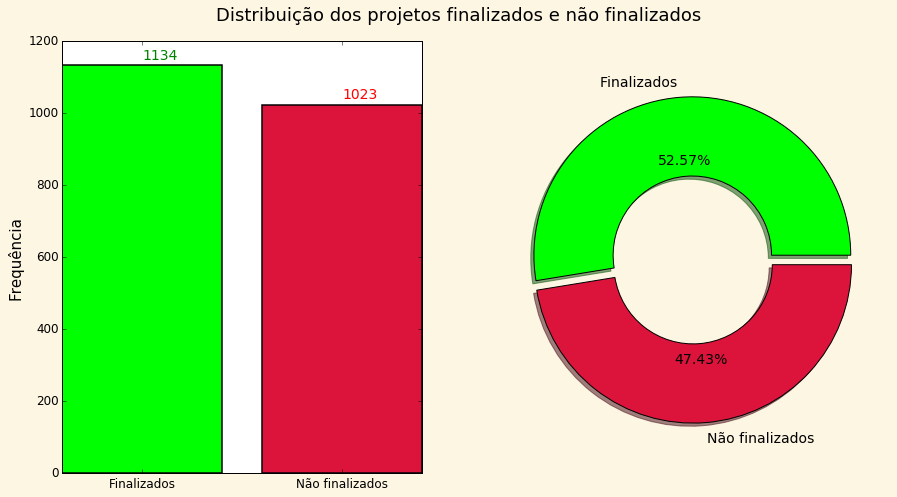

In [11]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (5, 6))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.2, 0, 1.1, 1])

# Gráfico I - Distribuição entre as classes
eixo1.bar(['Finalizados', 'Não finalizados'], dados['Finished'].value_counts().values, color = cores, lw = 1.5, edgecolor = 'k')

# Anotações no gráfico de barra
eixo1.annotate(f"{dados['Finished'].value_counts().values[0]}", xy = (0, 1150), fontsize = 14, color = 'g')
eixo1.annotate(f"{dados['Finished'].value_counts().values[1]}", xy = (1, 1040), fontsize = 14, color= 'r')
eixo1.tick_params(labelsize=12)

# Labels
eixo1.set_ylabel('Frequência', fontsize = 15)

# Gráfico II - Gráfico de pizza | Distribuição percentual entre projetos finalizados e não finalizados
eixo2.pie(dados['Finished'].value_counts(), autopct='%.2f%%', textprops={'size' : 14}, colors=cores,
         wedgeprops=dict(width=.5), shadow = True, labels = ['Finalizados', 'Não finalizados'], explode=(0.01, 0.05))

plt.suptitle('Distribuição dos projetos finalizados e não finalizados', fontsize = 18, y = 1.08, x = 1.1);

> Percebe-se que a situação atual da plataforma em relação ao percentual de projetos que não são finalizados, não está nada boa. Em valores percentuais temos que, de todos os projetos que são postos na plataforma para serem pegos e finalizados apenas um total de <font color = 'red'>52.57%</font> são pegos e finalizados, isso indica que quase <font color = 'red'>50%</font> dos projetos não são finalizados.

## Cii. Histogramas das variáveis explicativas

> Para entendermos melhor sobre a situação que se encontra a plataforma, vamos visualizar como os valores dos atributos  <b>Horas esperadas</b> e <b>preço</b> estão distribuidos.

<a id = "hist"></a>

---

**Media ($\mu$)**

> Em estatística, média é definida como o valor que demonstra a concentração dos dados de uma distribuição, como o ponto de equilíbrio das frequências em um histograma. Média também é interpretada como um valor significativo de uma lista de números.
> <center><h2>$\sum_{i=1}^{n}\frac{X_i}{n}$</h2></center>

**Desvio padrão (s)**

> Em probabilidade, o desvio padrão ou desvio padrão populacional é uma medida de dispersão em torno da média populacional de uma variável aleatória.

> <img src = 'https://calculareconverter.com.br/wp-content/uploads/2018/08/formula-desvio-padrao.png' width = 15%>

**Median ($\sigma$)**

> Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados. No conjunto de dados {1, 3, 3, 6, 7, 8, 9}, por exemplo, a mediana é 6.

<center><img src = 'https://miro.medium.com/max/754/0*wHMvuwRa_YF9SFwY.png'></center>

<h3><b>Horas esperadas/Expected_hours</b></h3>

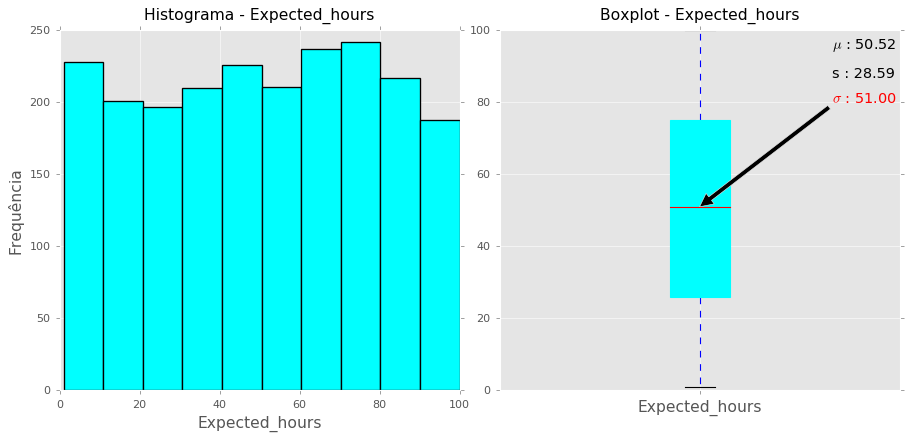

In [12]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (5, 4.5))

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.1, 0, 1, 1])

# Gráfico - Histograma da variável Horas esperadas
eixo1.hist(dados['Expected_hours'], lw = 1.2, edgecolor = 'k', color = 'aqua')

# Labels
eixo1.set_xlabel('Expected_hours', fontsize = 14)
eixo1.set_ylabel('Frequência', fontsize = 14)
eixo1.set_title('Histograma - Expected_hours', fontsize = 14, pad = 10);

# Gráfico II - Boxplot da variável - Expected_hours
caixas = eixo2.boxplot(dados['Expected_hours'], patch_artist=True)
for caixa, cor in zip(caixas['boxes'], cores):
    
    caixa.set(color = 'aqua')

# Labels - boxplot
eixo2.set_xticklabels(['Expected_hours'], fontsize = 14)
eixo2.set_title('Boxplot - Expected_hours', fontsize = 14, pad = 10)

# Anotações
eixo2.annotate(f'$\mu$ : {dados["Expected_hours"].mean():.2f}', xy = (1.33, 95), fontsize = 13)
eixo2.annotate(f's : {dados["Expected_hours"].std():.2f}', xy = (1.33, 87), fontsize = 13)
eixo2.annotate(f'$\sigma$ : {dados["Expected_hours"].median():.2f}', xy = (1, dados["Expected_hours"].median()), xytext=(1.33, 80), fontsize = 13,
              arrowprops=dict(facecolor='k'), color = 'r')
fig.savefig('h1.png', bbox_inches='tight')

> Análisando os 2 gráficos da variável <b>Horas esperdas/Expected_hours</b> podemos ver que não há nenhum anomalia no comportamento dos registros, ou seja, a distribuição do atributo <b>Horas esperdas</b> segue um comportamento normal. As medias de importância para nós são a média, mediana e o desvio padrão.

***Média***

> A média de <b>horas esperadas</b> por projeto é de <b>50.52</b> hrs

***Desvio padrão***

> O desvio padrão da variável <b>horas esperadas</b> é de <b>28.59</b>.

***Mediana***

> A mediana está com valor de <b>51.00</b> hrs, ou seja, 50% dos dados estão abaixo de <b>51</b>hrs e os outros 50% estão acima de <b>51</b>hrs.

<h3><b>Preço/Price</b></h3>

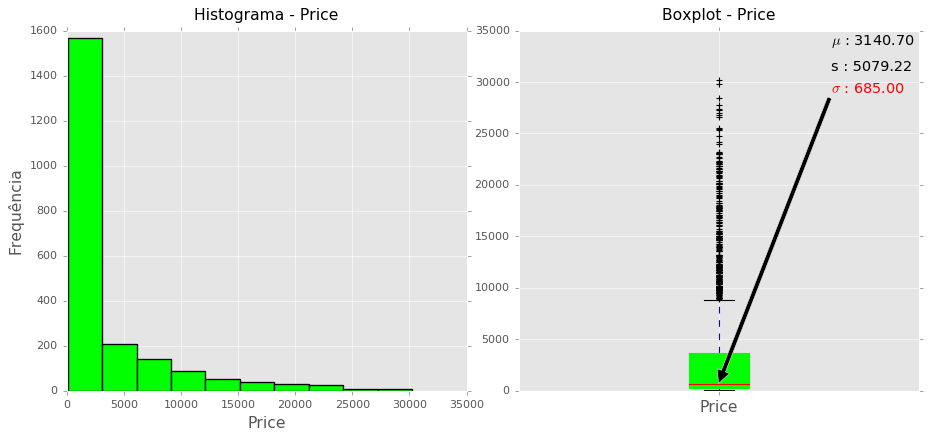

In [13]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (5, 4.5))
eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.13, 0, 1, 1])

# Gráfico - Histograma da variável Horas esperadas
eixo1.hist(dados['Price'], lw = 1.2, edgecolor = 'k', color = 'lime')

# Labels
eixo1.set_xlabel('Price', fontsize = 14)
eixo1.set_ylabel('Frequência', fontsize = 14)
eixo1.set_title('Histograma - Price', fontsize = 14, pad = 10);

# Gráfico II - Boxplot da variável - Expected_hours
boxes = eixo2.boxplot(dados['Price'], patch_artist=True)

for caixa, cor in zip(boxes['boxes'], cores):
    
    caixa.set(color = 'lime')

# Labels - boxplot
eixo2.set_xticklabels(['Price'], fontsize = 14)
eixo2.set_title('Boxplot - Price', fontsize = 14, pad = 10)

# Anotações
eixo2.annotate(f'$\mu$ : {dados["Price"].mean():.2f}', xy = (1.28, 33650), fontsize = 13)
eixo2.annotate(f's : {dados["Price"].std():.2f}', xy = (1.28, 31150), fontsize = 13)
eixo2.annotate(f'$\sigma$ : {dados["Price"].median():.2f}', xy = (1, dados["Price"].median()), xytext=(1.28, 29000), fontsize = 13,
              arrowprops=dict(facecolor='k'), color = 'r')
fig.savefig('h2.png', bbox_inches='tight')

> Nestá visualização conseguimos ver como está distribuido todos os preços dos projetos que são postos na plataforma <b>Alura</b>. Análisando o gráfico acima percebe-se a alta concentração de preços entre o intervalo [0, 4000], o que indica que tem muitas pessoas querendo pagar pouco por projetos com uma quantidade de horas esperadas que valeriam mais. No gráfico com o título "<b>Histograma - Expected_hours"</b> percebemos que a distribuição segue um padrão normal, ou seja, era esperado que a distribuição dos preços também seguisse um padrão parecido. Abaixo vamos comparar as duas distribuições.

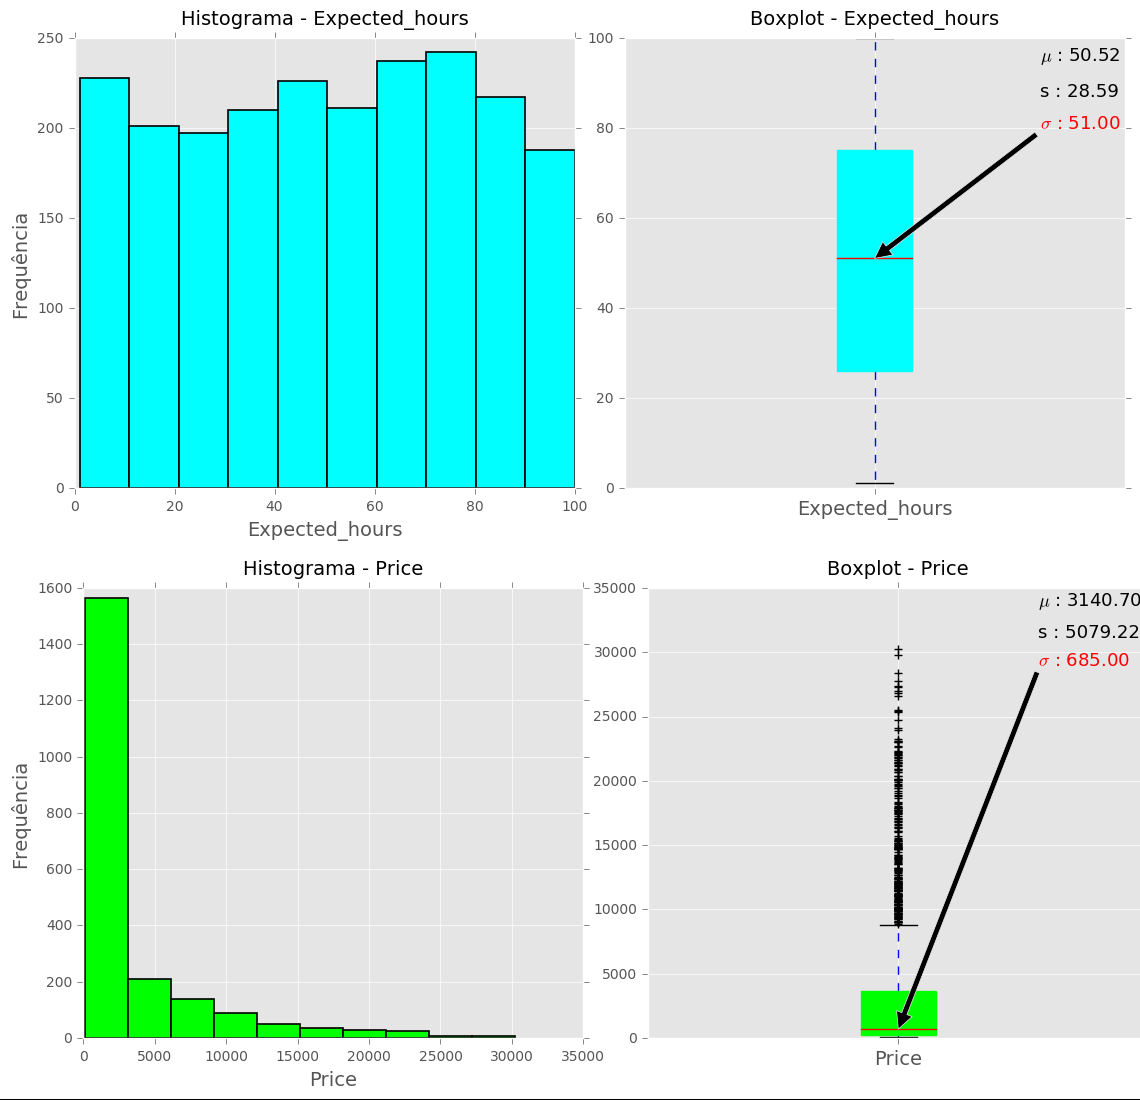

In [14]:
from PIL import Image

largura, altura = Image.open('h1.png').size

combinada = Image.new("RGB", (largura, 2 * altura))
intervalo = 0
for imagem in map(Image.open, ['h1.png', 'h2.png']):
    
    combinada.paste(imagem, (0, intervalo))
    intervalo += altura

combinada.save('combinada.png')
combinada

***Distribuição dos Preços de projetos finalizados e os não finalizados***

<b>Projetos - Finalizados</b>

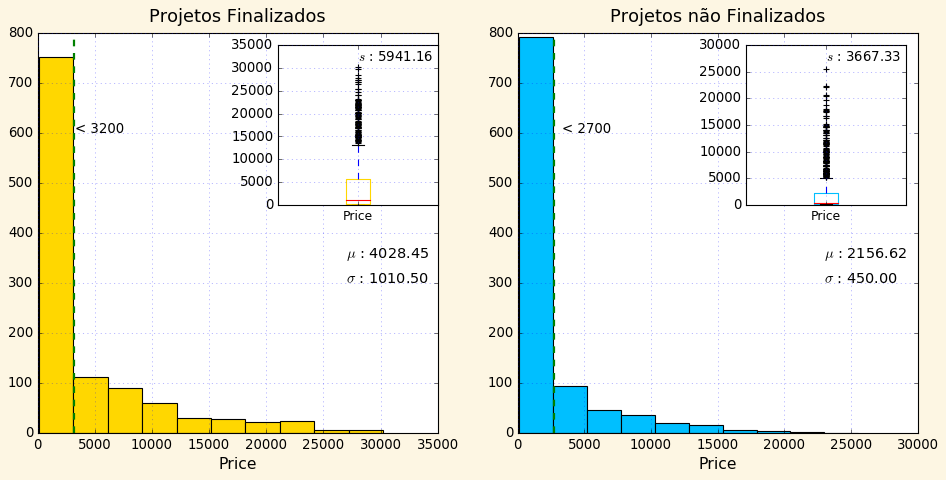

In [15]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (5, 5))
plt.style.use('classic')

# Gráfico dos projetos "finalizados"
#############################################
eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.6, 0.57, .4, .4])

# Gráfico I - Distribuição dos preços de projetos que foram finalizados
eixo1.hist(dados.query('Finished == "1"')['Price'], color = 'gold', edgecolor = 'k')
eixo1.grid(True, alpha =.5, color = 'b')

# Labels
eixo1.set_xlabel('Price', fontsize = 14, color = 'k')

# Título
eixo1.set_title('Projetos Finalizados', fontsize = 16, pad = 10)


# Anotações
eixo1.annotate(f"$\mu$ : {dados.query('Finished == 1')['Price'].mean():.2f}", xy = (27000, 350), fontsize = 13)
eixo1.annotate(f"$\sigma$ : {dados.query('Finished == 1')['Price'].median():.2f}", xy = (27000, 300), fontsize = 13)


eixo1.axvline(3200, lw = 2, ls = '--', color = 'green')
eixo1.annotate("< 3200", xy=(3300, 600))


# Gráfico II - Boxplot dos preços de projetos que foram finalizados
boxes = eixo2.boxplot(dados.query('Finished == 1')['Price'])
eixo2.grid(True, alpha = .5, color = 'b')
for caixa, cor in zip(boxes['boxes'], cores):
    
    caixa.set(color = 'gold')

eixo2.set_xticklabels(['Price'], fontsize = 11, color = 'k');


# Anotações
eixo2.annotate(f"$s$ : {dados.query('Finished == 1')['Price'].std():.2f}", xy = (1, 31500), fontsize = 12)

# Gráfico dos projetos "não finalizados"
#############################################
eixo3 = fig.add_axes([1.2, 0, 1, 1])
eixo4 = fig.add_axes([1.77, 0.57, .4, .4])

# Gráfico I - Distribuição dos preços de projetos não finálizados
eixo3.hist(dados.query('Finished == 0')['Price'], color = 'deepskyblue', edgecolor = 'k')
eixo3.grid(True, alpha =.5, color = 'b')

# Labels
eixo3.set_xlabel('Price', fontsize = 14, color = 'k')

# Título
eixo3.set_title('Projetos não Finalizados', fontsize = 16, pad = 10)


# Anotações
eixo3.annotate(f"$\mu$ : {dados.query('Finished == 0')['Price'].mean():.2f}", xy = (23000, 350), fontsize = 13)
eixo3.annotate(f"$\sigma$ : {dados.query('Finished == 0')['Price'].median():.2f}", xy = (23000, 300), fontsize = 13)

eixo3.axvline(2700, lw = 2, ls = '--', color = 'green')
eixo3.annotate("< 2700", xy=(3300, 600))

# Gráfico II - Boxplot dos preços de projetos que não foram finalizados
boxes = eixo4.boxplot(dados.query('Finished == 0')['Price'])
eixo4.grid(True, alpha = .5, color = 'b')
for caixa, cor in zip(boxes['boxes'], cores):
    
    caixa.set(color = 'deepskyblue')

eixo4.set_xticklabels(['Price'], fontsize = 11, color = 'k')

# Anotações
eixo4.annotate(f"$s$ : {dados.query('Finished == 0')['Price'].std():.2f}", xy = (1, 27000), fontsize = 12);


> Visualizando o primeiro gráfico acima, podemos verificar que o maior número de projetos que foram finalizados ofereciam um valor abaixo de <b>US: 3200</b>. A hipótese é que provavelmente são projetos simples com um preço equivalente ao eforço de realização. As informações úteis que também encontra-se no gráfico são, a média de preço dos projetos finalizados é de <b>US: 5941.16</b>, a mediana <b>US: 1010.50</b> e o desvio padrão <b>US: 5941.16</b>.

> No segundo gráfico com uma cor azul, onde encontra-se os preços dos projetos que não foram finalizados, percebe-se que a maioria dos projetos que não foram pegos, possuiam um valor abaixo de <b>US: 2700</b>. A hipótese é que se trata de projetos com um preço baixo em relação a quantidade de horas esperadas, em outras palavras, pessoas que querem pagar pouco por serviços pesados.

> Para sairmos da hipóse vamos visualizar um gráfico de dispersão, assim podemos ver como se comporta o preço em relação ao número de horas esperadas por projeto e marcar no gráfico os projetos que foram e os que não foram finalizados. Essa visualização encontra-se abaixo com mais explicações.

## Ciii. Gráfico de Dispersão

<a id = "dispersão"></a>

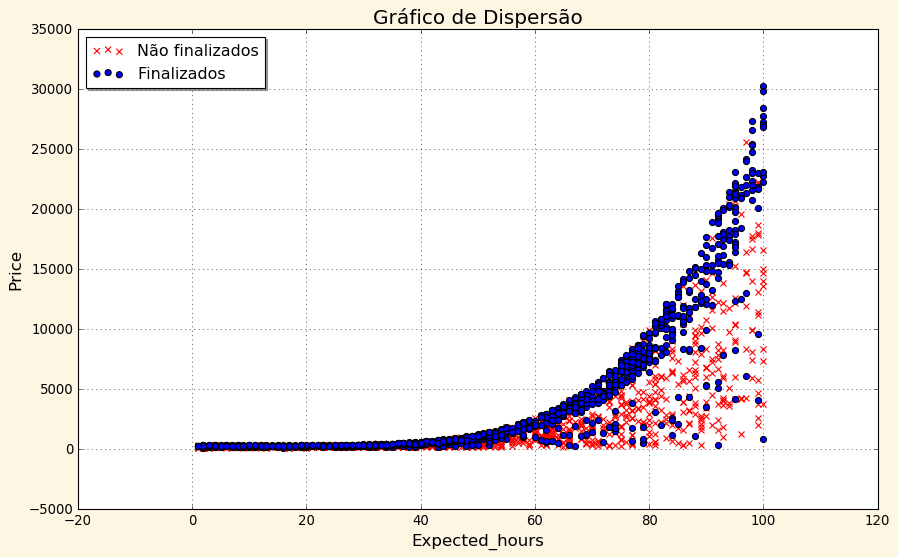

In [16]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (10, 6))
plt.style.use('classic')
eixo = fig.add_axes([0, 0, 1, 1])

cores = {0 : 'red', 1 : 'b'}
marcadores = {0 : 'x', 1 : 'o'}

for classe in dados['Finished'].unique():
    
    df = dados[dados['Finished'] == classe]
    eixo.scatter(df['Expected_hours'], df['Price'], s = 30, marker=marcadores[classe], color=cores[classe], edgecolor='k')
eixo.grid(True)


# Labels
eixo.set_xlabel('Expected_hours', fontsize = 15)
eixo.set_ylabel('Price', fontsize = 15)
eixo.set_title('Gráfico de Dispersão', fontsize = 18);
plt.legend(['Não finalizados', 'Finalizados'], loc = 'upper left', shadow = True, edgecolor = 'k');

<Figure size 1040x560 with 0 Axes>

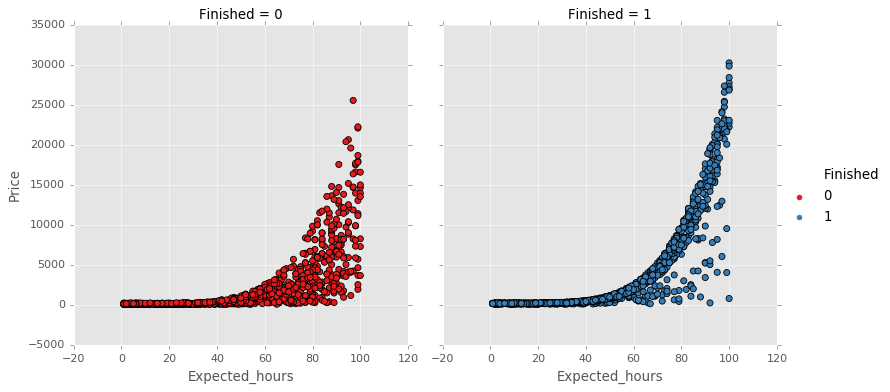

In [17]:
plt.style.use('ggplot')
plt.figure(figsize = (13, 7))

sns.relplot(x = 'Expected_hours', y = 'Price', data = dados, hue = 'Finished', col = 'Finished', edgecolor = 'k', palette = 'Set1', s= 30);

> Com estas duas visualizações de dispersão conseguimos ver como está distribuido os projetos que foram e os que não foram finalizados com base no <b>preço</b> x <b>horas esperadas</b>. Desta forma conseguir visualizar a curva que separa os projetos finalizados dos não finalizados, nosso objetivo é desenvolver um modelo com I.A que consiga aprender essa curva e ser capaz de classificar de forma eficiente os projetos que serão finalizados e os que não serão.

# D. Análise de Correlação <br>

## Di. Matriz de Correlação

<a id="corr"></a>

> No trabalho com análise de dados, muitas vezes precisamos construir uma matriz de correlação para descrever se há alguma associação entre as variáveis do seu conjunto de análise. Uma matriz de correlação é uma tabela mostrando coeficientes de correlação entre variáveis. Esse coeficiente varia entre 0 e 1.

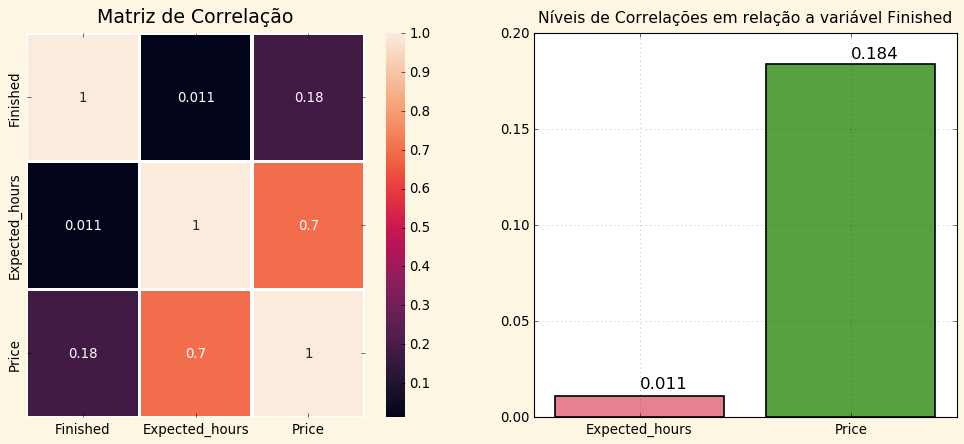

In [18]:
plt.style.use('Solarize_Light2')
plt.figure(figsize = (15, 6))
plt.style.use('classic')

# Gráfico I - Nível de Correlação em relação a variável Finished
#################################################
plt.subplot(121)
sns.heatmap(dados.corr(), annot = True, lw = 2)
plt.title('Matriz de Correlação', fontsize = 17, pad = 10)


# Gráfico II - Matriz de Correlação
#################################################
plt.subplot(122)
sns.barplot(dados.corr()['Finished'].drop(index = 'Finished').index, dados.corr()['Finished'].drop(index = 'Finished').values, edgecolor = 'k', lw = 1.5,
           palette=sns.color_palette("husl", 3))
plt.grid(True, color = 'k', alpha =.4)
plt.title('Níveis de Correlações em relação a variável Finished', fontsize = 14, pad = 10)

# Anotações
plt.annotate(f"{dados.corr()['Finished'].drop(index = 'Finished').iloc[0]:.3f}", xy=(0, 0.015), fontsize = 15)
plt.annotate(f"{dados.corr()['Finished'].drop(index = 'Finished').iloc[1]:.3f}", xy=(1, 0.187), fontsize = 15);

# E. Machine Learning - LinearSVC <br>

## Ei. Instânciando e treinando o estimador 

<a id = 'linearsvc'></a>

In [19]:
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import LinearSVC

**Realizando a separação dos dados**

In [20]:
np.random.seed(2020)

# Separando todos os dados nas variáveis x e y
x = dados[['Expected_hours', 'Price']]
y = dados['Finished']

# Utilizando o modelo train_test_split do scikit-learning para separar em dados de treino e teste
train_x, test_x, train_y, test_y = tts(x, y, test_size = .2, stratify=y)

In [21]:
# Instânciando o LinearSVC
linearsvc = LinearSVC()

# Visualizando o estimador
linearsvc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
# Treinando o LinearSVC
linearsvc.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Eii. Avaliando o LinearSVC

<h3><b>Métricas</b></h3>

**Precision/Precisão**

> Ainda usando o material do Google Developers, eles definem precisão como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou.

> $Precision = \frac{TP}{TP + FP}$

**Recall/Sensibilidade**

> No material do Google Developers para Machine Learning, podemos ver que recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se a mulher está grávida. É definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

> $Recall = \frac{TP}{TP + FN}$

**F1-Score**

> Já o f-score nos mostra o balanço entre a precisão e o recall de nosso modelo. Sua fórmula é:

> $F1-Score = 2 * \frac{Precision * Recall}{Precision + Recall}$

<a id='avaliandosvc'></a>

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
def avaliacao_linearsvc():
    
    # Gerando previsões com o LinearSVC
    previsoes = linearsvc.predict(test_x)
    
    # Visualizando relatório do estimador
    print(f'Relatório-:\n{classification_report(test_y, previsoes)}')
    
    # Visualizando a matriz de confusão
    plt.style.use('ggplot')
    sns.heatmap(confusion_matrix(test_y, previsoes), annot = True, lw = 1.4, fmt='d')
    plt.xlabel('Valor Predito', fontsize = 14)
    plt.ylabel('Valor Real', fontsize = 14)
    plt.title('Matriz de Confusão', fontsize = 16)

Relatório-:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       205
           1       1.00      0.03      0.05       227

    accuracy                           0.49       432
   macro avg       0.74      0.51      0.35       432
weighted avg       0.75      0.49      0.34       432



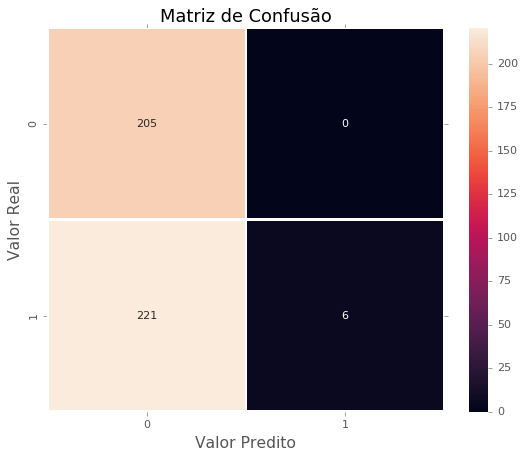

In [25]:
avaliacao_linearsvc()

> O Support Vector Machine nos deu um resultado muito ruim, isso porque o <b>LinearSVC</b> se trata de uma reta e retas só conseguem encontrar relações lineares. Para visualizar quais as decisões do LinearSVC, vamos utilizar um técnica chamada de curva de decisão onde conseguir plotar um gráfico para visualizar a fronteira de decisão do nosso estimador. 

## Eiii. Fronteira de Decisão

<a id="deicisaolinearsvc"></a>

In [26]:
# Obtendo os limites de cada eixo do plano cartesiano
x_min, x_max = test_x['Expected_hours'].min() - 1, test_x['Expected_hours'].max() + 2
y_min, y_max = test_x['Price'].min() - 1, test_x['Price'].max() + 2

# Criando um Grid com numpy
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / 100)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / 100)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Gerando todas as previsões do modelo com o grid criado com numpy
z = linearsvc.predict(pontos)
z = z.reshape(xx.shape)

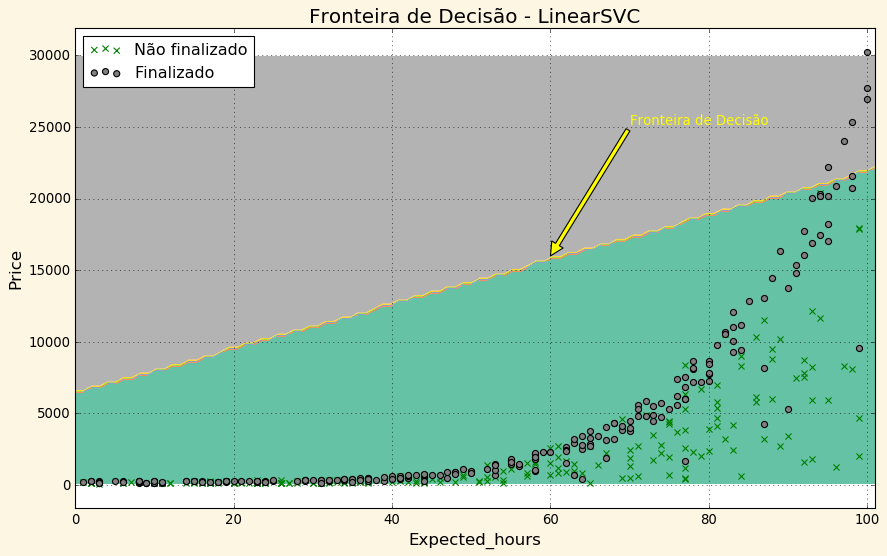

In [27]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (10, 6))
plt.style.use('classic')
eixo = fig.add_axes([0, 0, 1, 1])


cores = {0 : 'green', 1 : 'gray'}
marcadores = {0 : 'x', 1 : 'o'}
labels = {0 : 'Não finalizado', 1 : 'Finalizado'}

plt.contourf(xx, yy, z, cmap = 'Set2')
for classe in test_y.unique():
    
    df = test_x[test_y == classe]
    eixo.scatter(df['Expected_hours'], df['Price'], s = 30, marker=marcadores[classe], color=cores[classe], edgecolor='k', label=labels[classe])
eixo.grid(True)


# Labels
eixo.set_xlabel('Expected_hours', fontsize = 15)
eixo.set_ylabel('Price', fontsize = 15)
eixo.set_title('Fronteira de Decisão - LinearSVC', fontsize = 18)

eixo.annotate("Fronteira de Decisão", xy = (60, 16000), xytext=(70, 25200), 
             arrowprops=dict(facecolor='yellow'), color = 'yellow')
eixo.legend(loc = 'upper left')
fig.savefig("decisio1.png", bbox_inches='tight')

> Como vimos acima, a curva de decisão se trata de uma reta, para solucionar o nosso problema precisamos de um estimador que encontra relações não lineares. O <b>scikit-learn</b> disponibiliza vário estimador, o que vamos utilizar será o SVC do modulo <b>svm - Support Vector Machine/Máquina de vetores de suporte.</b>

# F. Machine Learning - SVC <br>

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Fi. Reiscalando os Dados

<a id="scaler"></a>

In [29]:
# Instânciando o StandardScaler
scaler = StandardScaler()

In [30]:
# Reiscalando os dados de treino e teste
train_X = scaler.fit_transform(train_x)
test_X = scaler.fit_transform(test_x)

## Fii. Instânciando e treinando o estimador

<a id="svc"></a>

In [31]:
# Instânciando o SVC
svc = SVC(probability=True)

# Visualizando o estimador
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
# Treinando o Estimador
svc.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Fiii. Avaliando o SVC
<a id ="avalsvc"></a>

In [33]:
def relatorio_svc():
    
    # Gerando previsões com o SVC
    previsoes = svc.predict(test_X)
    
    # Visualizando relatório do estimador
    print(f'Relatório-:\n{classification_report(test_y, previsoes)}')
    
    # Tamanho e estilo do gráfico
    plt.style.use('dark_background')
    plt.figure(figsize = (15, 6))
    
    # Gráfico I - matriz de confusão
    plt.subplot(121)
    sns.heatmap(confusion_matrix(test_y, previsoes), annot = True, lw = 1.4, fmt='d', linecolor='k')
    plt.xlabel('Valor Predito', fontsize = 14)
    plt.ylabel('Valor Real', fontsize = 14)
    plt.title('Matriz de Confusão', fontsize = 16)
    
    # Gráfico II - Curva ROC
    plt.subplot(122)
    probabilidades = svc.predict_proba(test_X)
    tp, fp, th = roc_curve(test_y, probabilidades[:,0])
    plt.plot(fp, tp, linewidth = 2, linestyle = ':', label = f'AUC = {roc_auc_score(test_y, previsoes):.3f}')
    plt.fill_between(fp, tp, alpha = .5, color = 'aqua')
    plt.fill_between([0, 1], [0, 1], alpha = .9, color = 'k')
    plt.grid(True, ls = ':', color = 'red')
    plt.legend(loc = 'lower right', edgecolor = 'k', shadow = True)
    plt.xlabel('False Positive', fontsize = 14)
    plt.ylabel('True Positive', fontsize = 14)
    plt.title('Curva ROC', fontsize = 15)

Relatório-:
              precision    recall  f1-score   support

           0       0.74      0.47      0.57       205
           1       0.64      0.85      0.73       227

    accuracy                           0.67       432
   macro avg       0.69      0.66      0.65       432
weighted avg       0.69      0.67      0.66       432



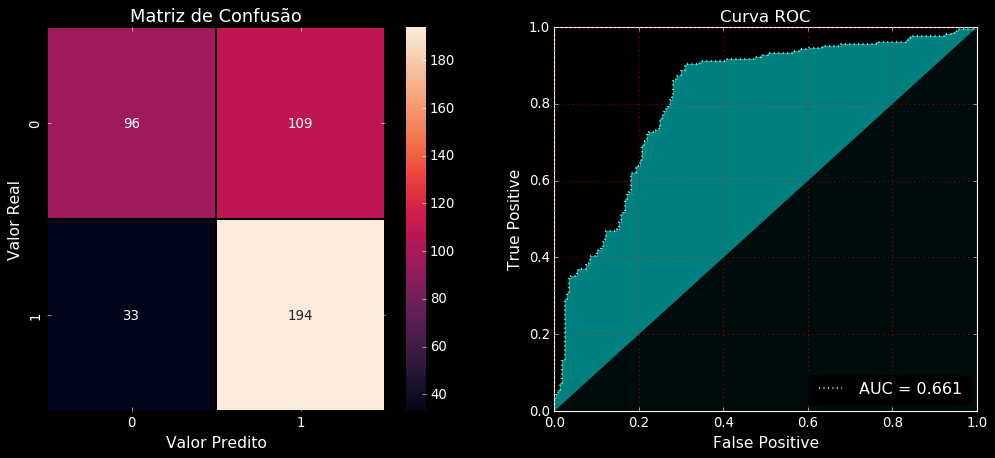

In [34]:
relatorio_svc()


## Fiv. Fronteira de Decisão do SVC
<a id="deicisaosvc"></a>

In [35]:
# Obtendo os valores do intervalor inferior e superior dos eixos
x_min, x_max = test_X[:, 0].min() - 0.5, test_X[:, 0].max() + 0.1
y_min, y_max = test_X[:, 1].min() - .5, test_X[:, 1].max() + .5

# Criando 100 pontos dentro do intervalo dos dois eixos
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / 100)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / 100)

# Gerando os valores de x e y para criar um grid
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Gerando previsões com o modelo
z = svc.predict(pontos)
z = z.reshape(xx.shape)

In [36]:
test_Y = test_y.copy()
test_Y.index = range(test_Y.shape[0])

df_test = pd.DataFrame(test_X, columns = ['Expected_hours', 'Price'])
df_test['Finished'] = test_Y
df_test.head(10).style.background_gradient(cmap="Blues", subset=["Expected_hours"])\
             .background_gradient(cmap="Greens", subset=["Price"])\
             .background_gradient(cmap="Reds", subset=["Finished"])

,Expected_hours,Price,Finished
0,-0.662389,-0.567648,0
1,0.657106,-0.371353,0
2,-0.733713,-0.600459,0
3,-0.127459,-0.454144,1
4,-1.76791,-0.576804,1
5,-1.41129,-0.599696,0
6,1.47733,-0.283029,0
7,-1.30431,-0.572226,1
8,1.15637,1.5048,1
9,1.37035,0.0170411,0


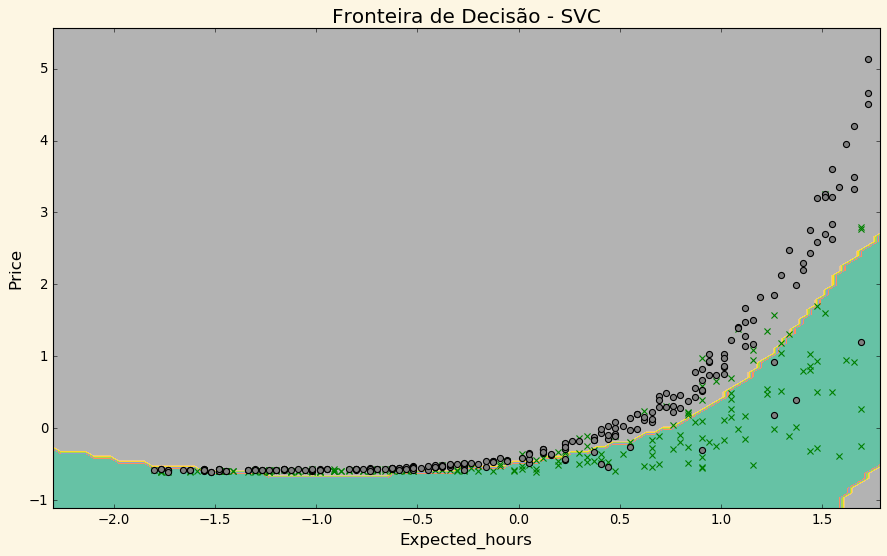

In [37]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (10, 6))
plt.style.use('classic')
eixo = fig.add_axes([0, 0, 1.034, 1])


cores = {0 : 'green', 1 : 'gray'}
marcadores = {0 : 'x', 1 : 'o'}
labels = {0 : 'Não finalizado', 1 : 'Finalizado'}

plt.contourf(xx, yy, z, cmap = 'Set2')
for classe in test_y.unique():
    
    df = df_test[df_test['Finished'] == classe]
    eixo.scatter(df['Expected_hours'], df['Price'], s = 30, marker=marcadores[classe], color=cores[classe], edgecolor = 'k')
    

# Labels
eixo.set_xlabel('Expected_hours', fontsize = 15)
eixo.set_ylabel('Price', fontsize = 15)
eixo.set_title('Fronteira de Decisão - SVC', fontsize = 18)
fig.savefig("decision2.png", bbox_inches='tight')

**Comparando Classificadores**

In [38]:
from PIL import Image

In [39]:
largura, altura = Image.open('decisio1.png').size
comb = Image.new("RGB", (largura, 2 * altura))
acrescimo = 0

for imagem in map(Image.open, ["decisio1.png", "decision2.png"]):
    
    comb.paste(imagem, (0, acrescimo))
    acrescimo += altura

comb.save("comb.png")

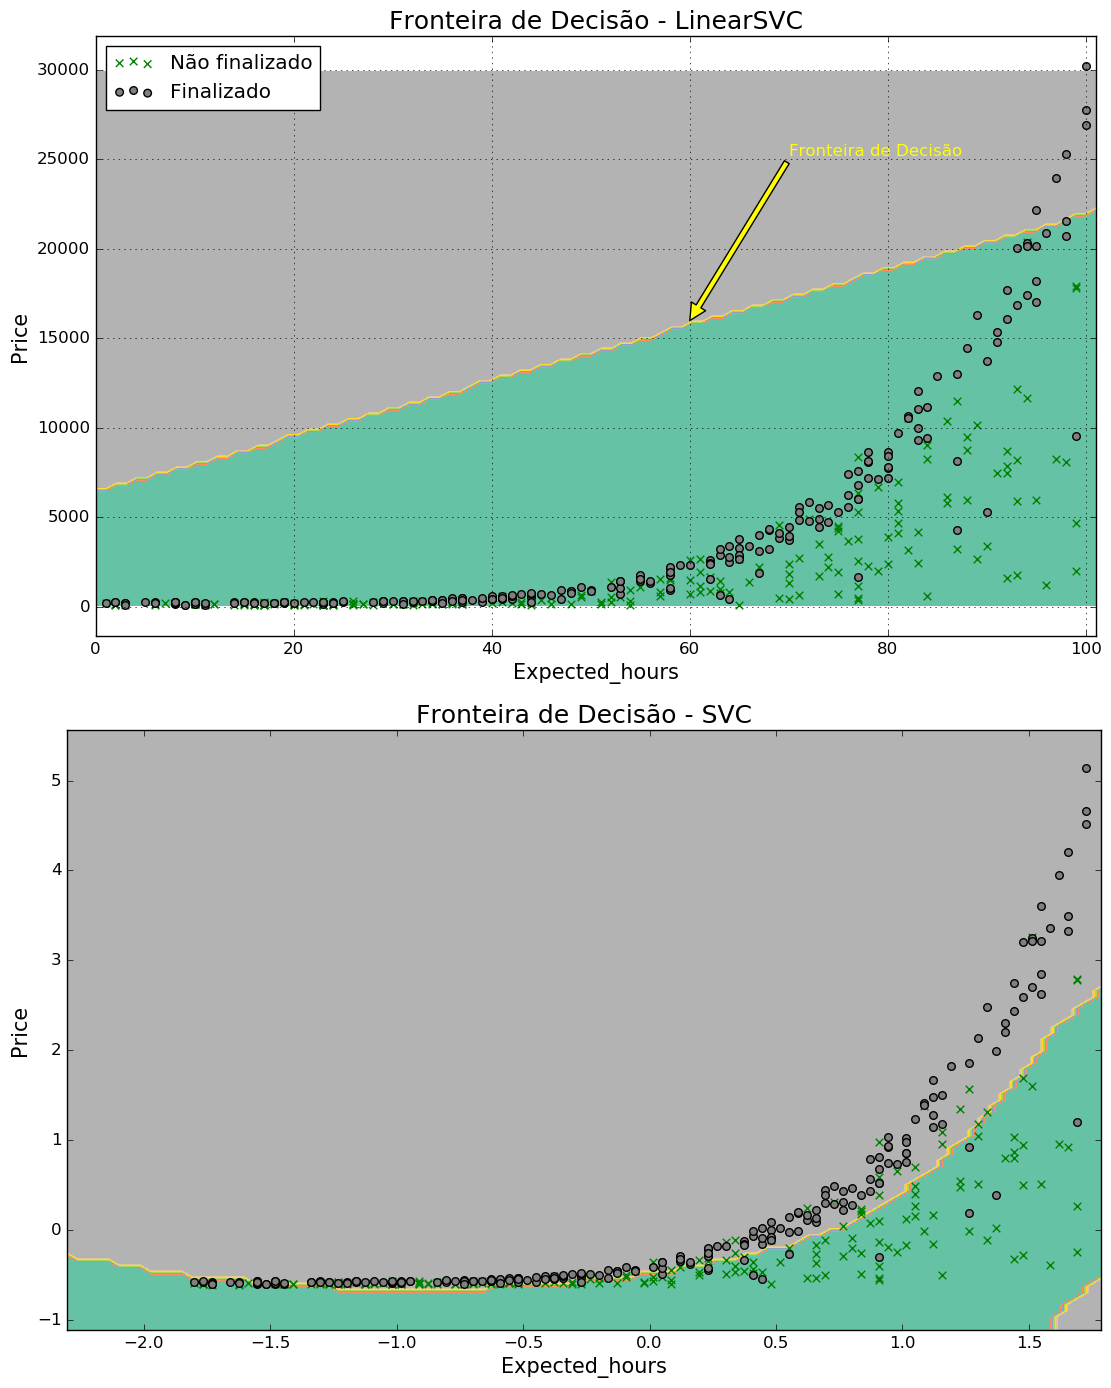

In [40]:
comb

> Conseguimos ver uma melhora significativa nos resultado do modelo em relação ao LinearSVC, mas de qualquer forma os resultados ainda não parece tão agradável já que os valores de cada métrica como a accuracy possui um valor menor que 70%. Vamos utilizar algoritmos mais potentes para obtermos melhores resultados. 